In [30]:
# 基础库函数
import numpy as np  # NumPy 是一个支持大型多维数组和矩阵运算的库，同时提供了大量的数学函数用于操作这些数组。

# 导入画图库
import matplotlib.pyplot as plt  # Matplotlib 是一个绘图库，主要用于绘制各种图表和可视化数据。

# Seaborn 是基于 Matplotlib 的数据可视化库，提供了更高级和美观的统计图形。
import seaborn as sns  

# 导入逻辑回归模型函数
from sklearn.linear_model import LogisticRegression  # scikit-learn 是一个机器学习库，LogisticRegression 是其中的逻辑回归模型，用于分类问题。


In [31]:
# 构建数据集
x_features = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])  # 特征数据，包含两个维度的坐标
y_label = np.array([0, 0, 0, 1, 1, 1])  # 标签数据，0 代表第一类，1 代表第二类

# 调用逻辑回归模型
lr_clf = LogisticRegression()  # 创建逻辑回归模型的实例

# 用逻辑回归模型拟合构造的数据集
lr_clf = lr_clf.fit(x_features, y_label)  # 训练模型，使用特征数据和标签数据


In [32]:
# 查看训练好的逻辑回归模型的权重
print('The weight of Logistic Regression:', lr_clf.coef_)  # 打印逻辑回归模型的权重 coef_

# 查看训练好的逻辑回归模型的截距
print('The intercept (w0) of Logistic Regression:', lr_clf.intercept_)  # 打印逻辑回归模型的截距|偏置 intercept_


The weight of Logistic Regression: [[0.73454893 0.69549413]]
The intercept (w0) of Logistic Regression: [-0.13154522]


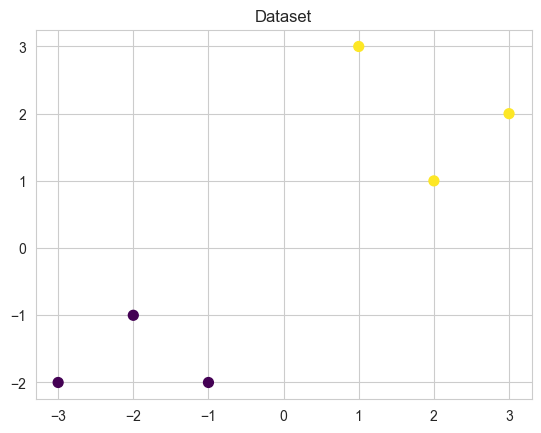

In [33]:
# 可视化构造的数据样本点
plt.figure()  # 创建一个新的图形窗口
plt.scatter(x_features[:, 0], x_features[:, 1], c=y_label, s=50, cmap='viridis')  
# 绘制（scatter）散点图，x_features[:, 0] 和 x_features[:, 1] 分别是特征的两个维度
# c=y_label 自动生成不同颜色用于不同标签，s=50 设置点的面积大小，cmap='viridis' 选择颜色映射

plt.title('Dataset')  # 设置图形标题
plt.show()  # 显示图形


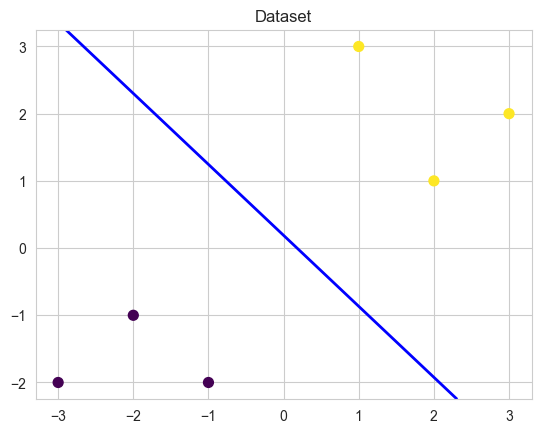

In [36]:
# 可视化决策边界
plt.figure()  # 创建一个新的图形窗口
plt.scatter(x_features[:, 0], x_features[:, 1], c=y_label, s=50, cmap='viridis')  
# 绘制散点图，显示样本点，颜色根据 y_label 进行编码

plt.title('Dataset')  # 设置图形标题

# 设置网格参数
nx, ny = 200, 100  # 定义网格的点数
x_min, x_max = plt.xlim()  # 获取当前 x 轴的范围
y_min, y_max = plt.ylim()  # 获取当前 y 轴的范围

# 创建网格，用于决策边界的可视化 x_grid, y_grid每个点的x,y坐标
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
#meshgrid(网格生成/网格坐标矩阵) 它的主要作用是将两个一维数组转换为两个二维数组，分别表示 x 和 y 坐标。
#linspace（线性空间） 它用于生成指定范围内的均匀分布的数字序列，常用于创建样本点或网格坐标。
#np.linspace(x_min, x_max, nx)：生成一个从 x_min 到 x_max 的线性间隔的数组，包含 nx 个点。这个数组表示网格在 x 轴上的坐标。

# 预测每个网格点的概率
z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])  # 预测网格点的类概率 ravel展平/拉平 

z_proba = z_proba[:, 1].reshape(x_grid.shape) 
# 取出属于类别 1 的概率，并重塑为网格形状
#z_proba(预测概率) 每个点类别概率

# 绘制决策边界  
plt.contour(x_grid, y_grid, z_proba, levels=[0.5], linewidths=2., colors='blue')  
# 绘制等高线，level=[0.5] 表示决策边界，linewidths 设置线宽，colors 设置颜色

plt.show()  # 显示图形


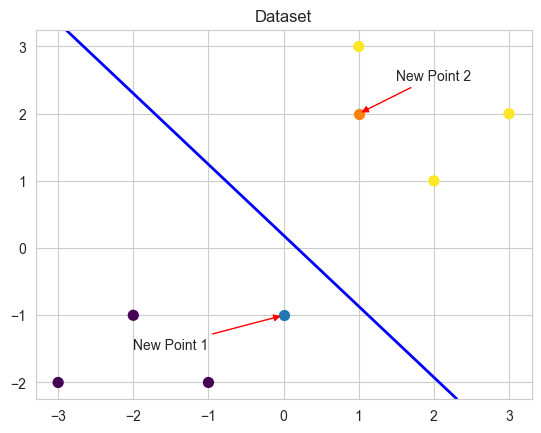

In [37]:
# 创建图形
plt.figure()

# 添加新点 1
x_features_new1 = np.array([[0, -1]])  # 定义新点 1 的坐标
plt.scatter(x_features_new1[:, 0], x_features_new1[:, 1], s=50, label='New Point 1')
# 绘制新点 1，s=50 设置点的大小，label 为图例标签

plt.annotate(text='New Point 1',
             xy=(0, -1),  # 注释指向的点
             xytext=(-2, -1.5),  # 注释文本的位置
             arrowprops=dict(arrowstyle='-|>', color='red'))  # 注释箭头的样式和颜色

# 添加新点 2
x_features_new2 = np.array([[1, 2]])  # 定义新点 2 的坐标
plt.scatter(x_features_new2[:, 0], x_features_new2[:, 1], s=50, label='New Point 2')
# 绘制新点 2

plt.annotate(text='New Point 2',
             xy=(1, 2),  # 注释指向的点
             xytext=(1.5, 2.5),  # 注释文本的位置
             arrowprops=dict(arrowstyle='-|>', color='red'))  # 注释箭头的样式和颜色

# 绘制训练样本
plt.scatter(x_features[:, 0], x_features[:, 1], c=y_label, s=50, cmap='viridis', label='Training Samples')
# c=y_label 使用标签设置点的颜色，cmap='viridis' 指定颜色映射，s=50 设置点的大小
plt.title('Dataset')  # 设置图表标题

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, levels=[0.5], linewidths=2., colors='blue')
# x_grid, y_grid 是网格坐标，z_proda 是每个网格点的预测概率
# levels=[0.5] 表示绘制概率为 0.5 的等高线（决策边界）
# linewidths=2. 设置线宽，colors='blue' 设置线的颜色

# 显示图形
plt.show()


In [38]:
#在训练集和测试集上分别用训练好的模型进行预测
y_label_new1_predict=lr_clf.predict(x_features_new1)
y_label_new2_predict=lr_clf.predict(x_features_new2)

print('The New point 1 predicted Probability of each class:\n',y_label_new1_predict)
print('The New point 2 predicted Probability of each class:\n',y_label_new2_predict)

#由于逻辑回归模型是概率预测模型（前文介绍的p=p(y=1|x,\theta)），所以我们可以利用predict_proba 函数预测其概率
y_label_new1_predict_proba=lr_clf.predict_proba(x_features_new1)
y_label_new2_predict_proba=lr_clf.predict_proba(x_features_new2)

print('The New point 1 predicted Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predicted Probability of each class:\n',y_label_new2_predict_proba)


The New point 1 predicted Probability of each class:
 [0]
The New point 2 predicted Probability of each class:
 [1]
The New point 1 predicted Probability of each class:
 [[0.69572855 0.30427145]]
The New point 2 predicted Probability of each class:
 [[0.11983517 0.88016483]]


In [44]:
#导入数组处理库
import numpy as np
import pandas as pd

#导入绘图库
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#导入数据集
from sklearn.datasets import load_iris

#获取每个变量的四个参数值
data =load_iris()
#获取每个变量对应的label
iris_target=data.target
#利用pandas转换为dataframe格式 
iris_features=pd.DataFrame(data=data.data, columns=data.feature_names)
print(iris_features)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [46]:
iris_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [47]:
iris_features.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [48]:
iris_features.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [51]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
pd.Series(iris_target).value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

In [53]:
iris_features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
iris_all=iris_features.copy()
iris_all['target']=iris_target

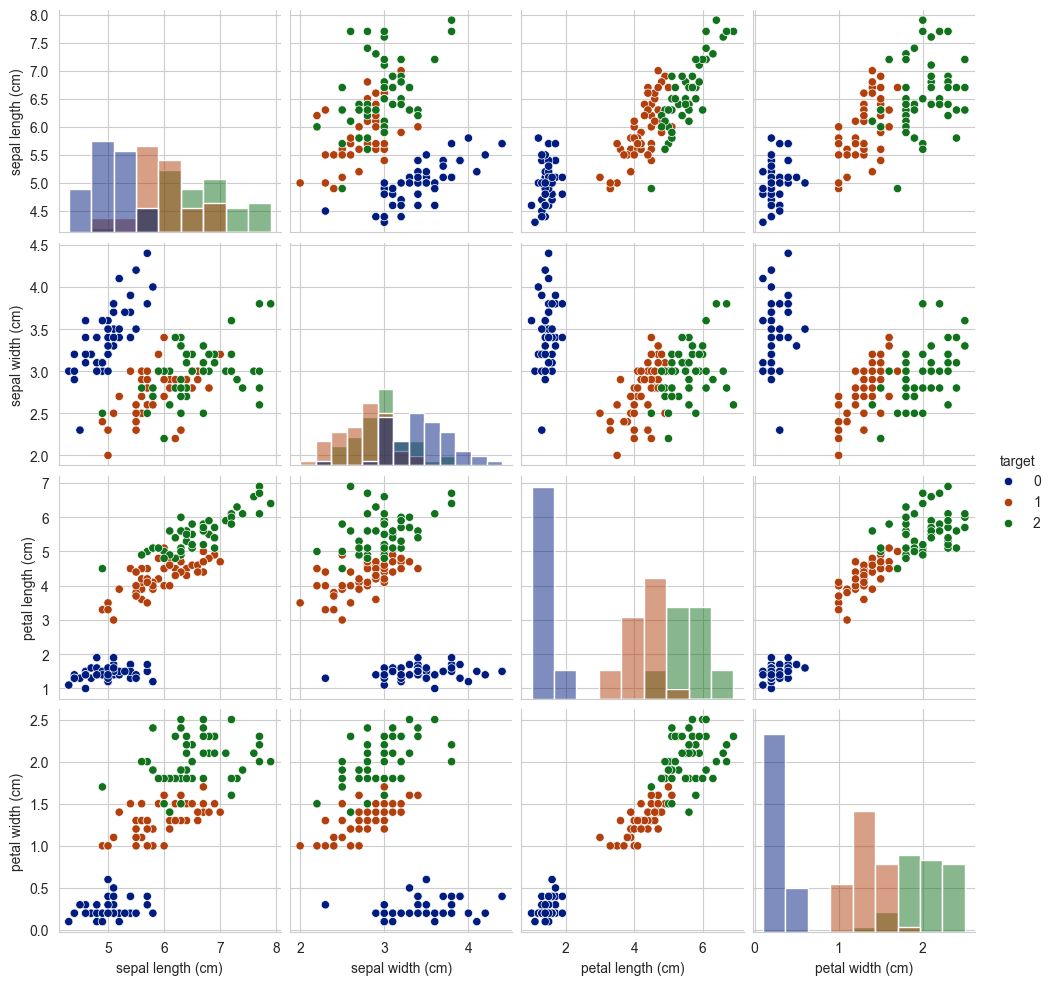

In [68]:
sns.pairplot(data=iris_all,diag_kind='hist',hue='target',palette='dark')
#sns: Seaborn 库的简称 pairplot: 成对图（用于显示特征之间的两两关系） data: 数据 iris_all: 数据集的名称（通常是包含所有特征和目标变量的 Pandas DataFrame diag_kind: 对角线类型 'hist': 直方图 hue: 色调（根据目标变量进行数据分类着色） 'target': 目标变量 palette: 调色板

plt.show()

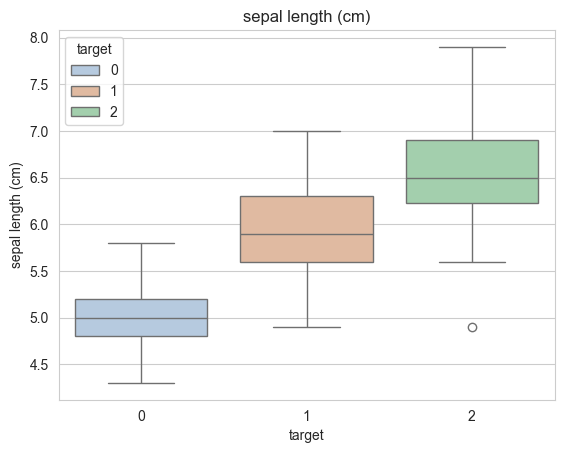

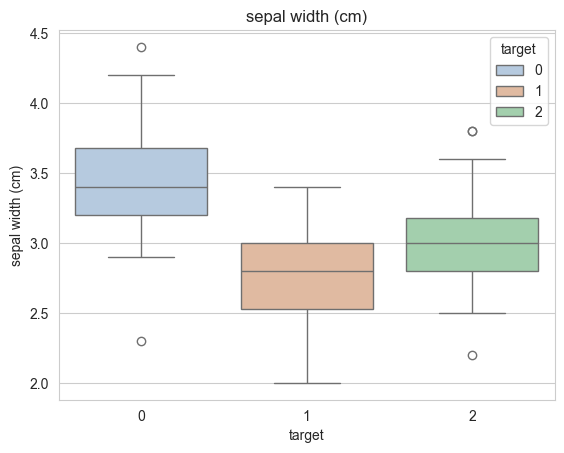

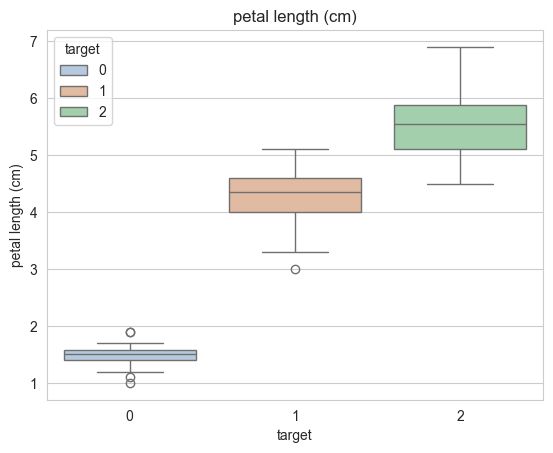

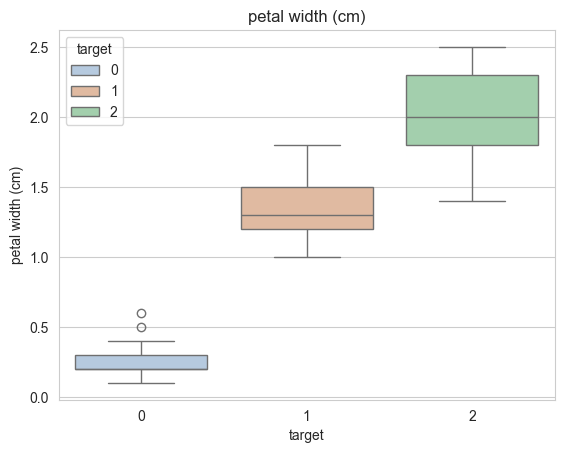

In [71]:
for col in iris_features.columns:
    #箱形图
    sns.boxplot(x='target',y=col,saturation=0.5,hue='target',palette='pastel',data=iris_all)
    plt.title(col)
    plt.show()

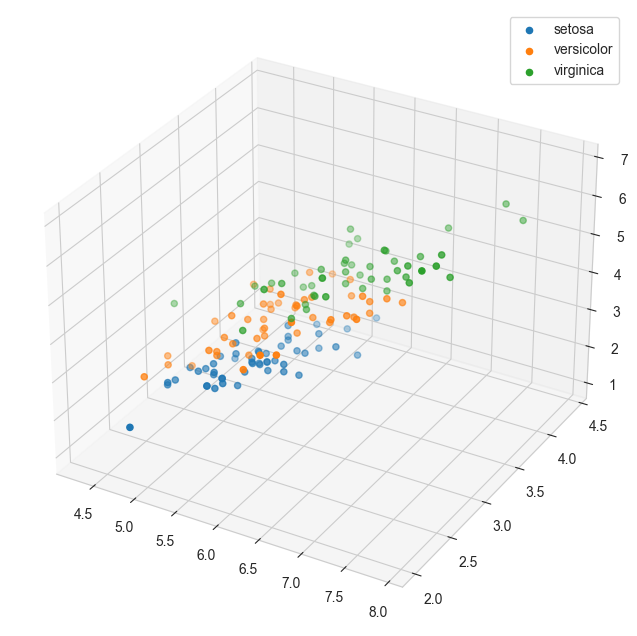

In [72]:
# 导入3D绘图模块
from mpl_toolkits.mplot3d import Axes3D

# 创建一个新的图形，设置图形大小为10x8英寸
fig = plt.figure(figsize=(10, 8))

# 在图形上添加一个3D坐标轴
ax = fig.add_subplot(111, projection='3d')

# 从数据集中筛选出不同类别的数据
# iris_all_class0 为类0（setosa）的数据
iris_all_class0 = iris_all[iris_all['target'] == 0].values

# iris_all_class1 为类1（versicolor）的数据
iris_all_class1 = iris_all[iris_all['target'] == 1].values

# iris_all_class2 为类2（virginica）的数据
iris_all_class2 = iris_all[iris_all['target'] == 2].values

# 在3D坐标轴中绘制类0的散点图
# 使用类0的特征（前3个特征）作为x、y、z轴的数据
ax.scatter(iris_all_class0[:, 0], iris_all_class0[:, 1], iris_all_class0[:, 2], label='setosa')

# 在3D坐标轴中绘制类1的散点图
ax.scatter(iris_all_class1[:, 0], iris_all_class1[:, 1], iris_all_class1[:, 2], label='versicolor')

# 在3D坐标轴中绘制类2的散点图
ax.scatter(iris_all_class2[:, 0], iris_all_class2[:, 1], iris_all_class2[:, 2], label='virginica')

# 显示图例，帮助区分不同类别的散点
plt.legend()

# 展示绘制的3D图形
plt.show()


In [77]:
from sklearn.model_selection import train_test_split
iris_features_part=iris_features.iloc[:100]
iris_target_part=iris_target[:100]

x_train,x_test,y_train,y_test=train_test_split(iris_features_part,iris_target_part,test_size=0.2,random_state=2020)

y_train

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [78]:
from sklearn.linear_model import LogisticRegression


In [79]:
clf=LogisticRegression(random_state=0,solver='lbfgs')


In [80]:
clf.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [81]:
print("coed", clf.coef_)
print("intercept", clf.intercept_)


coed [[ 0.44887693 -0.81345554  2.1455748   0.90139892]]
intercept [-6.53477786]


In [82]:
train_pred=clf.predict(x_train)
test_pred=clf.predict(x_test)


In [83]:
from sklearn import metrics
print("the acuracy of logistic regression model:", metrics.accuracy_score(y_train, train_pred))
print("the acuracy of logistic regression model:", metrics.precision_score(y_test, test_pred))

the acuracy of logistic regression model: 1.0
the acuracy of logistic regression model: 1.0


In [84]:
confusion_matrix_result=metrics.confusion_matrix(y_test, test_pred)
print('The confusion matrix result:\n', confusion_matrix_result)

The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


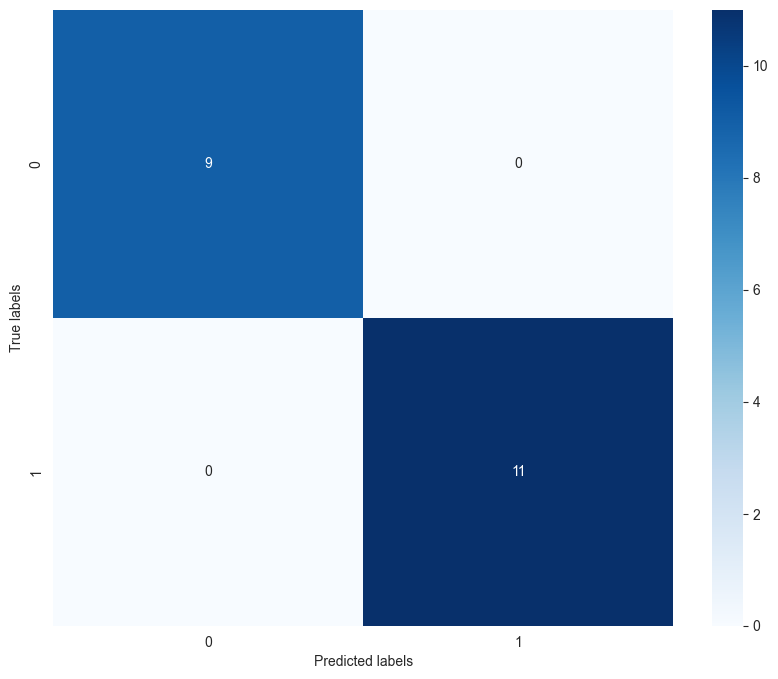

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [115]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size=0.2, random_state=2020)

# 训练模型
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [116]:
print("clf.coef_", clf.coef_)
print("clf.intercept_", clf.intercept_)


clf.coef_ [[-0.45787248  0.83167971 -2.26694306 -0.99758431]
 [ 0.33091689 -0.72991101 -0.06785096 -0.98925963]
 [ 0.12695559 -0.1017687   2.33479402  1.98684395]]
clf.intercept_ [  9.4322815    3.93625316 -13.36853466]


In [120]:
train_pred=clf.predict(x_train)
test_pred=clf.predict(x_test)

train_pred_proba=clf.predict_proba(x_train)
test_pred_proba=clf.predict_proba(x_test)

# print('The test predict Probability of each class:\n',test_pred_proba)

print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_pred))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_pred))

The accuracy of the Logistic Regression is: 0.9833333333333333
The accuracy of the Logistic Regression is: 0.8666666666666667


[[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


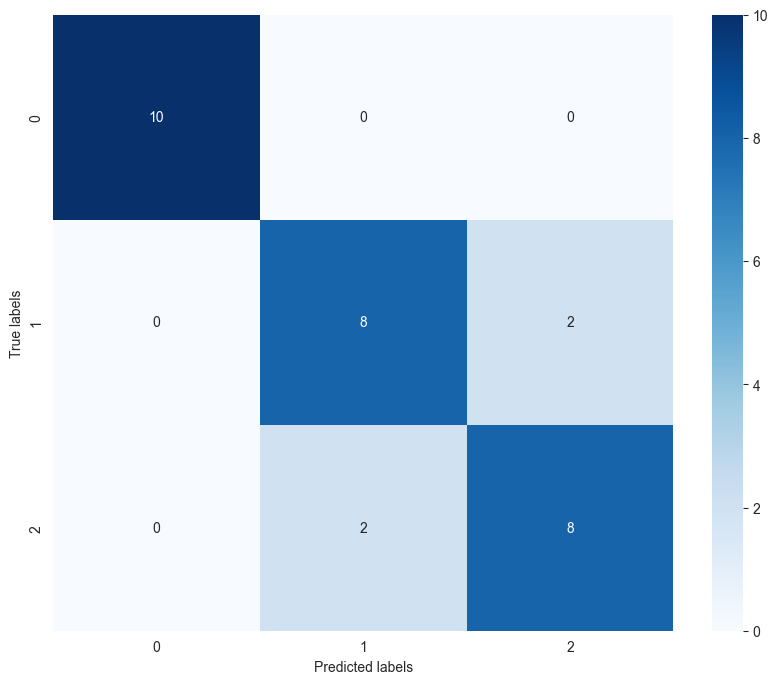

In [121]:
confusion_matrix_result=metrics.confusion_matrix(y_test,test_pred)
print(confusion_matrix_result)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()